[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/Trajectory_fitting.ipynb)

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

![alt text](http://www.softschools.com/formulas/images/trajectory_formula_1.png)

![alt text](http://www.softschools.com/formulas/images/trajectory_formula_2.png)

In [0]:
def traj(x, velocity, angle, g=9.8):
  angle = np.deg2rad(angle)
  lhs = x * np.tan(angle)
  rhs_top = g * x ** 2
  rhs_bottom = (2*(velocity)**2) * (np.cos(angle)**2)
  return lhs - (rhs_top / rhs_bottom)

In [0]:
def traj_rad(x, v, angle, g=9.8):
#   angle = np.deg2rad(angle)
  lhs = x * np.tan(angle)
  rhs_top = g * x ** 2
  rhs_bottom = (2*(v)**2) * (np.cos(angle)**2)
  return lhs - (rhs_top / rhs_bottom)

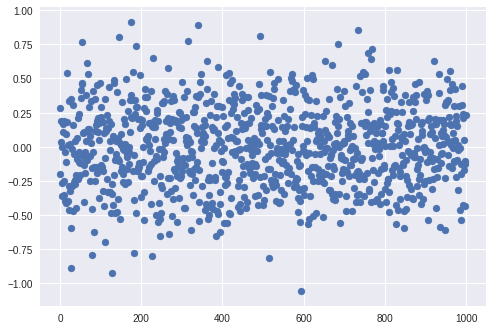

In [332]:
plt.scatter(np.arange(1000), np.random.normal(0, 0.3, 1000))

In [0]:
def clip_traj(traj_data):
  traj_data_clipped = np.clip(traj_data, a_min=0, a_max=None)
  first_zero = len(traj_data) - 1
  for i, val in enumerate(traj_data_clipped[::-1]):
    if val:
      print(i)
      first_zero = i
      break
  return traj_data[:-first_zero]

In [0]:
def gen_fake_traj(angle=45, velocity=7, n=20, noise=0.01):
  data = traj(np.arange(n), velocity=velocity, angle=angle, g=9.8)
  noisy_data = data + np.random.normal(0, noise, n)

  # if the last of half of teh data dips below zero  
  if (noisy_data[int(n/2):] < 0).any():
    noisy_data = clip_traj(noisy_data)
  return noisy_data

testing trag outputs : https://www.desmos.com/calculator/gjnco6mzjo

In [335]:
max(gen_fake_traj(angle=15, velocity=70, n=2000))

1750


16.75141110626722

In [336]:
(fake_data[10:] < 0).any()

False

1994


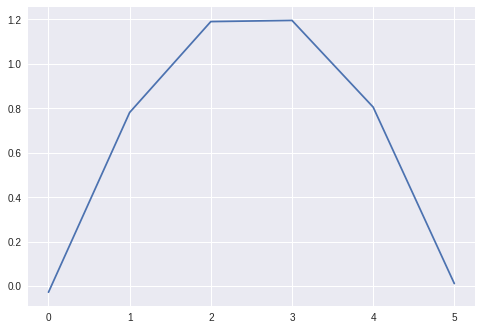

In [337]:
fake_data = gen_fake_traj(angle=45, velocity=7, n=2000)
plt.plot(fake_data)
# plt.axes().set_aspect('equal')



(0, 10)

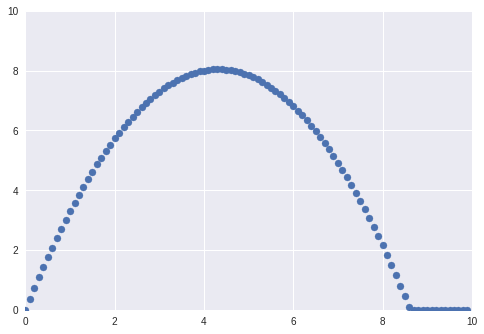

In [338]:
plt.scatter(np.arange(100)/10,np.clip(traj(np.arange(100)/10, 13, 75, g=9.8),a_min=0, a_max=None))
plt.xlim(0, 10)
plt.ylim(0, 10)

# Use tensorflow to find angle

In [0]:
import tensorflow as tf

In [0]:
def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

In [390]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

angle_constant = tf.Variable(40.0, name='angle_constant')
force_constant = tf.Variable(50.0, name='force_constant')
gravity_constant = tf.constant(9.8, name='gravity_constant')

tf_lhs = x * tf.tan(deg2rad(angle_constant))
tf_rhs_top = gravity_constant * x ** 2
tf_rhs_bottom = (2*(force_constant)**2) * (tf.cos( deg2rad(angle_constant))**2)
output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
output

<tf.Tensor 'sub:0' shape=(?, 1) dtype=float32>

In [391]:
loss = tf.losses.mean_squared_error(y, output) 
loss

<tf.Tensor 'mean_squared_error/value:0' shape=() dtype=float32>

In [0]:
optimiser = tf.train.AdamOptimizer(learning_rate=1)
optimiser_op = optimiser.minimize(loss)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

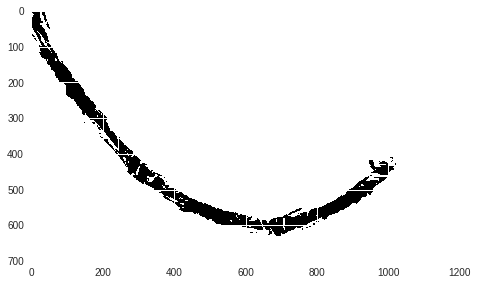

In [394]:
shot_data = np.load('my_shot.npy')[::-1, ::-1]
plt.imshow(shot_data)

In [0]:
x_input = []
y_output = []
it = np.nditer(shot_data, flags=['multi_index'])
while not it.finished:
#     print("%d <%s>" % (it[0], it.multi_index), end=' ')
    if it[0]:
      y_t, x_t  =  it.multi_index
      x_input.append(x_t), y_output.append(y_t)
    it.iternext()

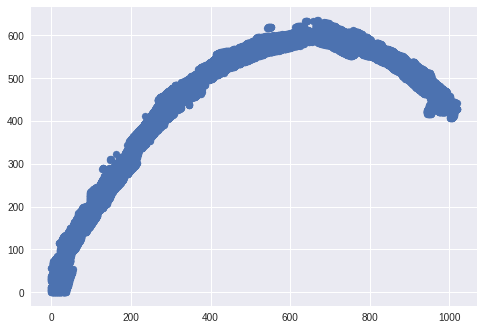

In [396]:
plt.scatter(x_input, y_output)

In [397]:
# input_data = gen_fake_traj(angle=45, velocity=7, n=200)



for i in range(2000):

  _, c = sess.run([optimiser_op, loss],feed_dict={x : np.array(x_input).reshape(-1, 1), 
                                                  y: np.array(y_output).reshape(-1, 1)})
  
  if (i % 100 == 0):
    print(c)

1899722.6
136173.14
21621.625
2191.1514
507.79065
421.34006
418.2882
418.22076
418.2199
418.21982
418.21982
418.21985
418.21985
418.21985
418.21985
418.21985
418.21982
418.21985
418.21985
418.21985


In [399]:
a,f = sess.run([angle_constant.value(), force_constant.value()])
a,f

(61.957726, 123.50694)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


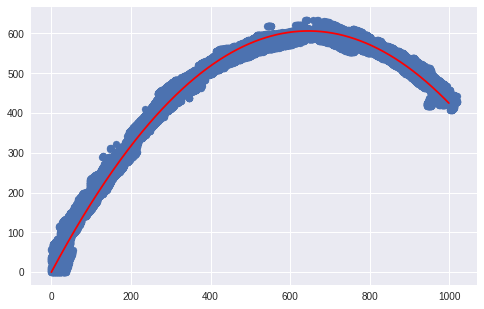

In [400]:
# plt.scatter(np.arange(len(input_data)),input_data)
plt.scatter(x_input, y_output)
plt.plot(traj(np.arange(1000), f, a, 9.8), c='r')

plt.axes().set_aspect('equal')

In [381]:
traj(np.arange(1000), f, a, 9.8)

array([  0.        ,   1.87593266,   3.74895846,   5.61907738,
         7.48628945,   9.35059465,  11.21199298,  13.07048445,
        14.92606905,  16.77874679,  18.62851766,  20.47538166,
        22.3193388 ,  24.16038908,  25.99853248,  27.83376903,
        29.66609871,  31.49552152,  33.32203746,  35.14564655,
        36.96634876,  38.78414411,  40.5990326 ,  42.41101422,
        44.22008897,  46.02625686,  47.82951788,  49.62987204,
        51.42731933,  53.22185976,  55.01349332,  56.80222001,
        58.58803984,  60.37095281,  62.1509589 ,  63.92805814,
        65.70225051,  67.47353601,  69.24191464,  71.00738642,
        72.76995132,  74.52960936,  76.28636054,  78.04020485,
        79.79114229,  81.53917287,  83.28429658,  85.02651343,
        86.76582341,  88.50222653,  90.23572278,  91.96631216,
        93.69399468,  95.41877033,  97.14063912,  98.85960105,
       100.5756561 , 102.2888043 , 103.99904562, 105.70638008,
       107.41080768, 109.11232841, 110.81094227, 112.50

In [0]:
from sklearn.metrics import mean_squared_error

In [326]:
mean_squared_error(fake_data, traj(np.arange(len(fake_data)), f, a, g))

6.331915485771035